In [49]:
import config_utils
import file_utils
import mapping
import naming_utils
import numpy as np
import os
from matplotlib import pyplot as plt

path = '/data/commissioning/pedestal_scan/2020_07_10_001/'
# path = '/data/commissioning/pedestal_scan/2020_07_10_002/'

dhc = 'H30'
dhe = 'H1012'

print(dhe,dhc,path)

module_flavor = naming_utils.dhe_name_to_flavor(dhe)

mapper = mapping.mapper(module_type='pxd9', module_flavor=module_flavor, asicpair=0)


filename = os.path.join(path, "%srawframe_data.dat" % dhc)

try:
    data = file_utils.read_raw_file(filename, dhe, asicpair= 0,
                                frames=200, use_header=True, skip_broken_frames=True)[0]
except Exception as e:
    print(e)

print(data.shape)

nframes = data.shape[2]

H1012 H30 /data/commissioning/pedestal_scan/2020_07_10_001/
(768, 256, 200)


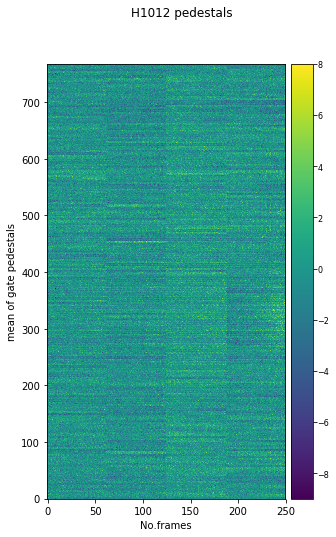

In [58]:
#ped = np.median(data, axis=2)
ped = data[:,:,-1].astype(np.int16)  - data[:,:,150].astype(np.int16) 

peds_m = mapper(ped)
# peds_m = mapping.matrixToDcd(ped)

fig, ax = plt.subplots(figsize=(5, 8))
fig.suptitle('%s pedestals'%dhe)

pos = ax.imshow(peds_m, interpolation="none",origin="lower", aspect="auto")
ax.set_xlabel('No.frames')
ax.set_ylabel('mean of gate pedestals')
cbar = fig.colorbar(pos, fraction=0.126,pad=0.02,orientation="vertical")
cbar.ax.tick_params(labelsize=8, pad=1)


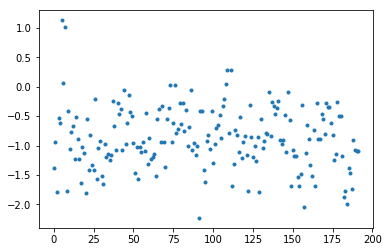

In [33]:
fig, ax = plt.subplots()

x = range(192)
y = np.mean(mapping.matrixToDcd(data[:,:,-1]), axis=1) - np.mean(mapping.matrixToDcd(data[:,:,0]), axis=1)
ax.plot(x,y,marker='.',ls='')


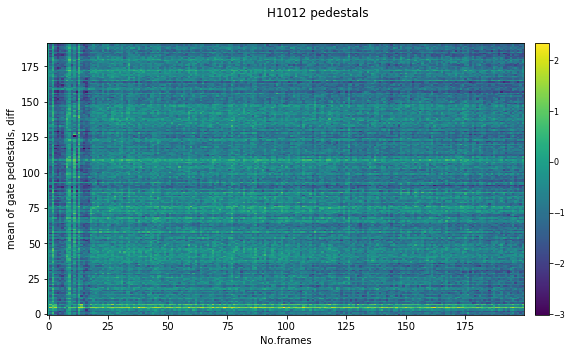

In [59]:

# print(np.mean(mapping.matrixToDcd(data[:,:,0]), axis=1))

# mean_g = np.transpose([np.mean(mapping.matrixToDcd(data[:,:,i].astype(np.int16) ), axis=1) for i in range(nframes)])
mean_g = np.transpose([np.mean(mapping.matrixToDcd(data[:,:,i].astype(np.int16) ), axis=1) - np.mean(mapping.matrixToDcd(data[:,:,0].astype(np.int16) ), axis=1) for i in range(nframes)])

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('%s pedestals'%dhe)

pos = ax.imshow(mean_g, interpolation="none",origin="lower", aspect="auto")
ax.set_xlabel('No.frames')
# ax.set_ylabel('mean of gate pedestals')
ax.set_ylabel('mean of gate pedestals, diff')
cbar = fig.colorbar(pos, fraction=0.126,pad=0.02,orientation="vertical")
cbar.ax.tick_params(labelsize=8, pad=1)


# CM correction

H1012 H30 /data/commissioning/pedestal_scan/2020_07_10_001/
(768, 256, 200)


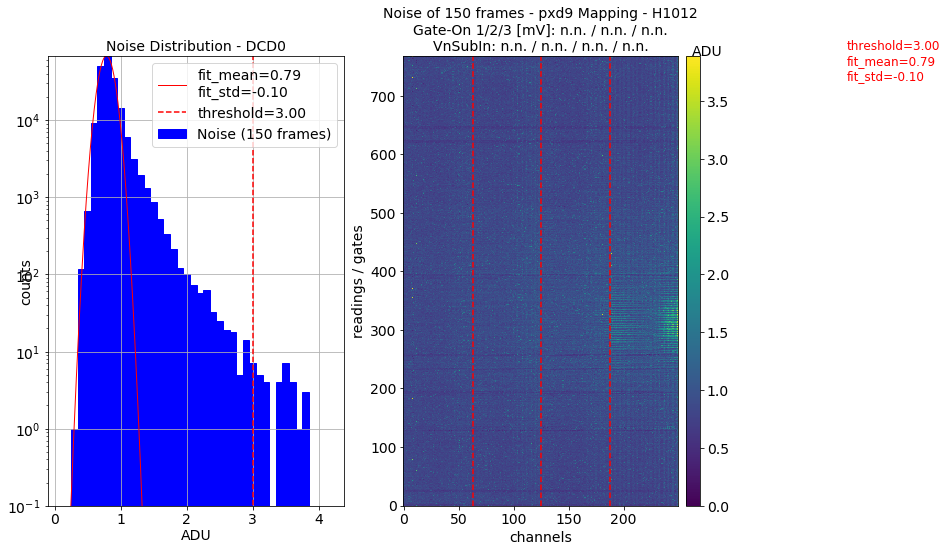

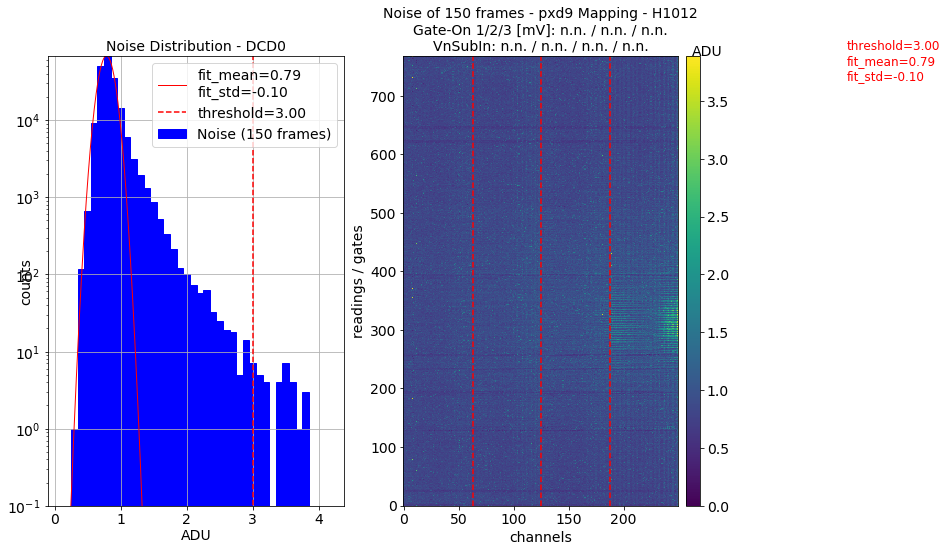

In [10]:
import config_utils
import file_utils
import mapping
import naming_utils
import numpy as np
import os
from matplotlib import pyplot as plt
from calibrations.pedestal.analysis import calculate_pedestal_with_cm
import plots

path = '/data/commissioning/pedestal_scan/2020_07_10_001/'
# path = '/data/commissioning/pedestal_scan/2020_07_10_002/'

dhc = 'H30'
dhe = 'H1012'

print(dhe,dhc,path)

module_flavor = naming_utils.dhe_name_to_flavor(dhe)

mapper = mapping.mapper(module_type='pxd9', module_flavor=module_flavor, asicpair=0)


filename = os.path.join(path, "%srawframe_data.dat" % dhc)

try:
    data = file_utils.read_raw_file(filename, dhe, asicpair= 0,
                                frames=200, use_header=True, skip_broken_frames=True)[0]
except Exception as e:
    print(e)

print(data.shape)

# nframes = data.shape[2]

drain_mask = np.full(256, False, dtype=np.bool)
drain_mask[10:16] = True

result = calculate_pedestal_with_cm(data[:,:,50:], drain_mask,threshold=5)

# ped = result['cm_data']


# plots.plot_pedestals(data=result['cm_data'], module=dhe, device='pxd9', module_type=module_flavor, asicpair=0)

plots.plot_noise(data=result['cm_data'], device='pxd9', module=dhe, module_type=module_flavor, asicpair=0)
